<a href="https://colab.research.google.com/github/herreraskarina/Exercises/blob/main/GitHub_Binary_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Logistic Regression

Dataset about credit card fraud obtained from [kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?select=card_transdata.csv).

This dataset has the following variables:

* distance_from_home - distance between home and the place where the transaction was made.

* distance_from_last_transaction - the distance from the location where the last transaction took place.

* ratio_to_median_purchase_price - Ratio between transaction price and average transaction price.

* repeat_retailer - Whether the transaction took place at the same store.

* used_chip - Whether the transaction was made with a credit card.

* used_pin_number - Whether the transaction took place using PIN number.

* online_order - Whether the transaction was online.

* fraud - Whether the transaction is fraudulent.


## Activity 1: Load the data and check for missing data. If so, proceed with the treatment you deem appropriate.

In [60]:
# importing libraries
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [61]:
# importing data
from google.colab import drive
drive.mount('/content/drive')
# creating dataset
df = pd.read_csv('/content/drive/MyDrive/card_transdata.csv')
# checking basic information about the dataset
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [62]:
# checking for null data in the dataset
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [63]:
# observing the values of the variables
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Activity 2: Select the variables you find interesting to try to predict whether or not there was fraud.

In [65]:
# checking correlation among the variables
df.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


**Note**: There is no linear correlation between the variables. It might be interesting to use all the variables in the model.

## Activity 3: Check for imbalance of variable `fraud`. If any, do a class balancing.

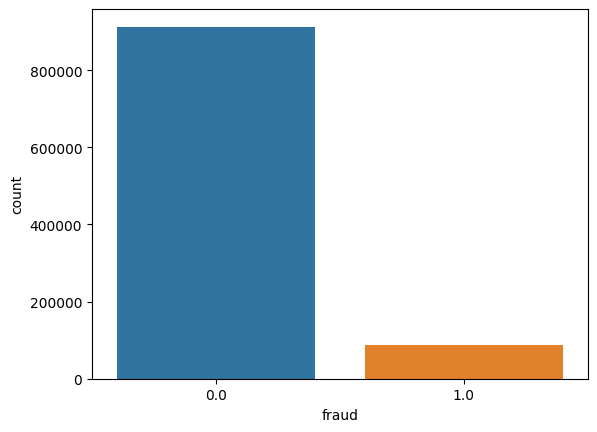

In [66]:
# observing the balancing of the fraud variable
sns.countplot(x=df['fraud']);

**Note**: One class significantly outweighs the other. Since we have a lot of observations, we're going to use a technique called undersampling. This technique consists of discarding observations from the class that has more observations until both classes have the same amount.

In [67]:
# separating the variables x and y
X = df.drop('fraud', axis=1)
y = df['fraud']

# balancing classes with undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

## Activity 4: Create a logistic regression model.

In [68]:
# adding the constant to the model
X = sm.add_constant(X)
# creating logistic regression model
model = sm.Logit(y, X).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.209525
         Iterations 10


In [69]:
# observing the predicted values
model.predict(X)

0         0.034615
1         0.011072
2         0.621764
3         0.000619
4         0.195777
            ...   
174801    0.999694
174802    0.773380
174803    0.527924
174804    1.000000
174805    0.999830
Length: 174806, dtype: float64

In [70]:
# creating the variable with the predictions
y_pred = (model.predict(X) >= 0.5).astype(int)
y_pred

0         0
1         0
2         1
3         0
4         0
         ..
174801    1
174802    1
174803    1
174804    1
174805    1
Length: 174806, dtype: int64

## Activity 5: Check model parameters and whether they are relevant.

In [71]:
# checking model parameters
model.params

const                             -7.701163
distance_from_home                 0.029556
distance_from_last_transaction     0.049989
ratio_to_median_purchase_price     1.220745
repeat_retailer                   -1.467037
used_chip                         -1.216724
used_pin_number                  -10.562632
online_order                       5.065051
dtype: float64

In [72]:
# interpreting the parameters
params = np.exp(model.params)-1
params

const                              -0.999548
distance_from_home                  0.029997
distance_from_last_transaction      0.051260
ratio_to_median_purchase_price      2.389712
repeat_retailer                    -0.769392
used_chip                          -0.703801
used_pin_number                    -0.999974
online_order                      157.388445
dtype: float64

**Interpretation of the results**: For each unit that the value of the distance_from_home increases, the chance of the transaction being a fraud increases by 2%. For each unit that the value of repeat_retailer increases, the chance of the transaction being a fraud decreases by 77%.

In [73]:
# observing information about the model
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               174806
Model:                          Logit   Df Residuals:                   174798
Method:                           MLE   Df Model:                            7
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                  0.6977
Time:                        14:13:39   Log-Likelihood:                -36626.
converged:                       True   LL-Null:                   -1.2117e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -7.7012      0.054   -142.618      0.000      -7.807      -7.595
distance_from_home                 0.0296      0.000    130.724      0.

**Note**: The pseudo R2 value is 69%, which indicates that the model is good. The P>|z| of the variables is 0, which indicates that all of them are relevant to predict y.

## Activity 6: Create the confusion matrix and the corresponding heatmap.

In [74]:
# importing function
from sklearn.metrics import confusion_matrix
# creating confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
conf_matrix

array([[81518,  5885],
       [ 4409, 82994]])

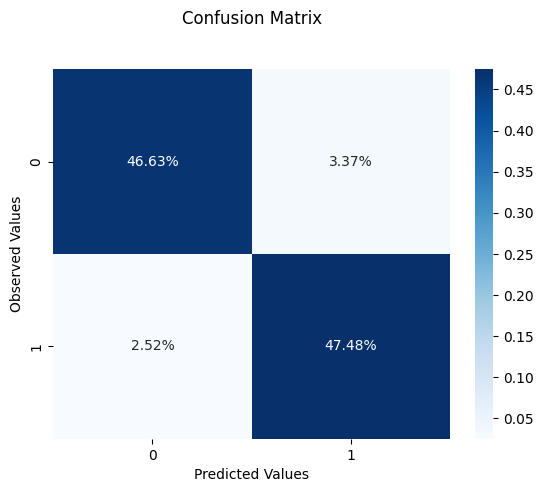

In [75]:
# creating heatmap with percentages
sns.heatmap(conf_matrix/np.sum(conf_matrix),
            annot=True, fmt='.2%', cmap='Blues');
# customizing chart
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Observed Values')
plt.xlabel('Predicted Values');

**Note**: The confusion matrix and the heatmap show that the model was right about around 95% of the values.

## Activity 7: Check the other metrics (sensitivity, specificity, f1-score).

In [76]:
# importing library to generate the table with the metrics
from sklearn.metrics import classification_report
# printing metrics
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     87403
         1.0       0.93      0.95      0.94     87403

    accuracy                           0.94    174806
   macro avg       0.94      0.94      0.94    174806
weighted avg       0.94      0.94      0.94    174806



**Note**: The metrics show that the model is 94% accurate. The other metrics have equally high values, which indicates that the model is good.

## Activity 8: Create the ROC curve for this model.

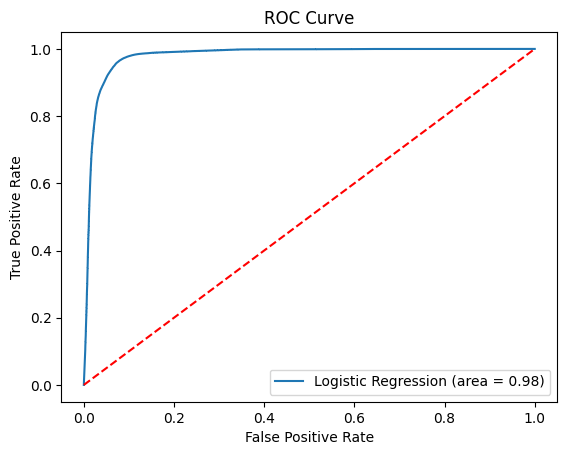

In [77]:
# importing functions
from sklearn.metrics import roc_curve, roc_auc_score
# generating the graph of the ROC curve
logit_roc_auc = roc_auc_score(y, model.predict(X))
fpr, tpr, thresholds = roc_curve(y, model.predict(X))
# customizing chart
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right");

**Note**: The blue curve is very close to 1, with the area being 0.98. This means that the model is good.

## Activity 9: Predict whether or not a transaction with the characteristics below is a fraud.

* `distance_from_home = 82`
* `distance_from_last_transaction = 13`
* `ratio_to_median_purchase_price = 14`
* `repeat_retailer = 1`
* `used_chip = 0`
* `used_pin_number = 0`
* `online_order = 1`

In [78]:
# applying the model to the mentioned values, where the first value must be the constant
prediction = model.predict([1, 82, 13, 14, 1, 0, 0, 1])
prediction

array([0.99999989])

In [79]:
prediction2 = (model.predict([1, 82, 13, 14, 1, 0, 0, 1]) >= 0.5).astype(int)
prediction2

array([1])

**Answer**: A transaction with the characteristics mentioned above has a 99% chance of being a fraud.

## Activity 10: Redo the exercises without doing class balancing and check for any problems.

In [80]:
# creating variables for the model
X2 = df.drop('fraud', axis=1)
y2 = df['fraud']
# adding the constant to the model
X2 = sm.add_constant(X2)
# creating logistic regression model
model2 = sm.Logit(y2, X2).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.135695
         Iterations 12


In [81]:
model2.predict(X2)

0         0.000078
1         0.000061
2         0.020542
3         0.007451
4         0.058587
            ...   
999995    0.000025
999996    0.000095
999997    0.005996
999998    0.020837
999999    0.015454
Length: 1000000, dtype: float64

In [82]:
# creating the variable with the predictions
y_pred2 = (model2.predict(X2) >= 0.5).astype(int)
y_pred2

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Length: 1000000, dtype: int64

In [83]:
# checking parameters
model2.params

const                            -10.361061
distance_from_home                 0.015217
distance_from_last_transaction     0.025258
ratio_to_median_purchase_price     0.862251
repeat_retailer                   -0.621471
used_chip                         -1.049060
used_pin_number                  -13.740402
online_order                       6.651379
dtype: float64

In [84]:
# interpreting the parameters
params2 = np.exp(model2.params)-1
params2

const                              -0.999968
distance_from_home                  0.015333
distance_from_last_transaction      0.025579
ratio_to_median_purchase_price      1.368487
repeat_retailer                    -0.462846
used_chip                          -0.649733
used_pin_number                    -0.999999
online_order                      772.850567
dtype: float64

In [85]:
# observing information about the model
print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999992
Method:                           MLE   Df Model:                            7
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                  0.5423
Time:                        14:13:49   Log-Likelihood:            -1.3570e+05
converged:                       True   LL-Null:                   -2.9649e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -10.3611      0.044   -237.200      0.000     -10.447     -10.275
distance_from_home                 0.0152   8.32e-05    182.831      0.

In [86]:
y_pred2 = (model2.predict(X2) >= 0.5).astype(int)

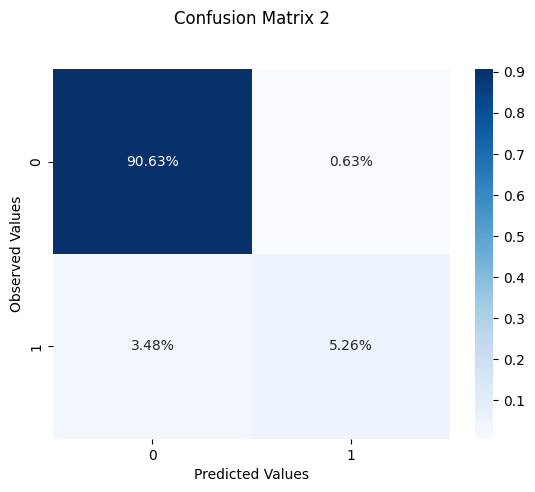

In [87]:
conf_matrix2 = confusion_matrix(y2, y_pred2)
sns.heatmap(conf_matrix2/np.sum(conf_matrix2),
            annot=True, fmt='.2%', cmap='Blues');
plt.title('Confusion Matrix 2', y=1.1)
plt.ylabel('Observed Values')
plt.xlabel('Predicted Values');

In [88]:
# printing metrics
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    912597
         1.0       0.89      0.60      0.72     87403

    accuracy                           0.96   1000000
   macro avg       0.93      0.80      0.85   1000000
weighted avg       0.96      0.96      0.96   1000000



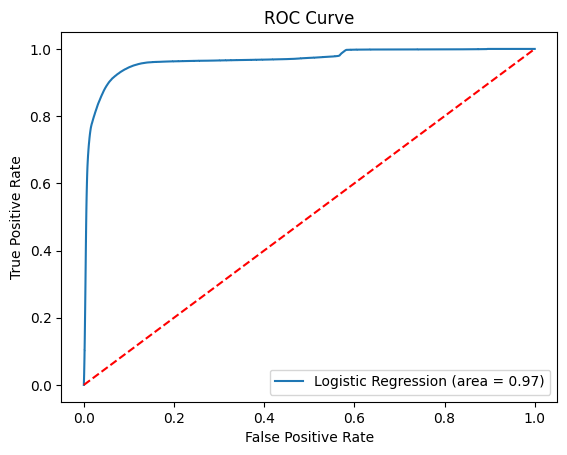

In [89]:
# generating the ROC curve
logit_roc_auc2 = roc_auc_score(y2, model2.predict(X2))
fpr, tpr, thresholds = roc_curve(y2, model2.predict(X2))
# customizing chart
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {round(logit_roc_auc2, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right");

In [90]:
# applying the model on the mentioned values
previsao_2 = model2.predict([1, 82, 13, 14, 1, 0, 0, 1])
previsao_2

array([0.99991008])

In [91]:
# changing the result so that it is displayed in binary terms
previsao_3 = (model2.predict([1, 82, 13, 14, 1, 0, 0, 1]) >= 0.5).astype(int)
previsao_3

array([1])

**Answer**: Using the unbalanced variables, the model has lower precision and accuracy, as well as a lower pseudo R2. As the data has many more values marked as non-fraud, the model does not learn well to predict fraud and may miss fraudulent operations. Despite this, the model predicted correctly with the given information.